In [2]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [22]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [39]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [40]:
model = tf.keras.Sequential([l0])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [43]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


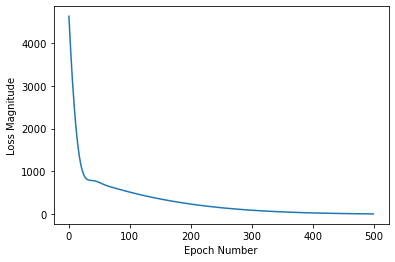

In [44]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [50]:
print(model.predict([100.0]))

[[211.74742]]


In [49]:
l0a = tf.keras.layers.Dense(units=4, input_shape=[1])
l1a = tf.keras.layers.Dense(units=4)
l2a = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0a, l1a, l2a])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0a.get_weights()))
print("These are the l1 variables: {}".format(l1a.get_weights()))
print("These are the l2 variables: {}".format(l2a.get_weights()))

Finished training the model
[[211.74742]]
Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit
These are the l0 variables: [array([[-0.03192927,  0.36464524, -0.48023102, -0.28034618]],
      dtype=float32), array([ 2.5753345,  3.3293033, -3.3342736, -3.2965043], dtype=float32)]
These are the l1 variables: [array([[-0.39891508,  0.36119926, -0.4701661 , -0.82147884],
       [-0.79547036,  0.10328685, -1.1037439 , -0.4320349 ],
       [-0.12003121, -0.1218602 ,  0.76777744,  0.56612027],
       [ 0.556651  ,  0.2166069 ,  1.0550234 ,  0.4574008 ]],
      dtype=float32), array([-3.3152463 , -0.40359512, -3.312036  , -3.2432768 ], dtype=float32)]
These are the l2 variables: [array([[-0.4589201 ],
       [-0.16885297],
       [-1.0518609 ],
       [-0.9842779 ]], dtype=float32), array([3.1747005], dtype=float32)]


In [48]:
tf.keras.backend.clear_session()